# Plots for interpolated transport between SSH contours

Landscape and portrait versions per hotspot, for eddy kinetic energy, interfacial form stress conversion and Reynolds stress conversion

In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import xarray as xr
import cftime
import glob
import dask
import os
import datetime
import matplotlib.colors as col
import dask.array as dsa
from cosima_cookbook import distributed as ccd
import cartopy.crs as ccrs
import cmocean as cm
from scipy.ndimage.filters import uniform_filter1d


from collections import OrderedDict

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client

In [2]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/39747/status,
Dashboard: /proxy/39747/status,Workers: 4
Total threads: 16,Total memory: 64.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:33891,Workers: 4
Dashboard: /proxy/39747/status,Total threads: 16
Started: Just now,Total memory: 64.00 GiB
Comm: tcp://127.0.0.1:39917,Total threads: 4
Dashboard: /proxy/39827/status,Memory: 16.00 GiB
Nanny: tcp://127.0.0.1:41207,


In [3]:
from matplotlib import gridspec
import matplotlib as mpl

In [4]:
plt.rc('text', usetex=True)
plt.rcParams.update({'font.size': 12})

In [5]:
EKE = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/EKE_10yr.nc').EKE
MKE = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/MKE_10yr.nc').MKE
Reynolds = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/Reynolds_10yr_fulldepth.nc').Reynolds
Form_stress = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/Form_stress_10yr_fulldepth.nc').Form_stress


In [6]:
n=35
x = 0.5
lower = plt.cm.RdBu_r(np.linspace(0, x, n))
white = plt.cm.RdBu_r(np.ones(80-2*n)*x)
upper = plt.cm.RdBu_r(np.linspace(1-x, 1, n))
colors = np.vstack((lower, white, upper))
tmap = mpl.colors.LinearSegmentedColormap.from_list('map_white', colors)


# Form stress

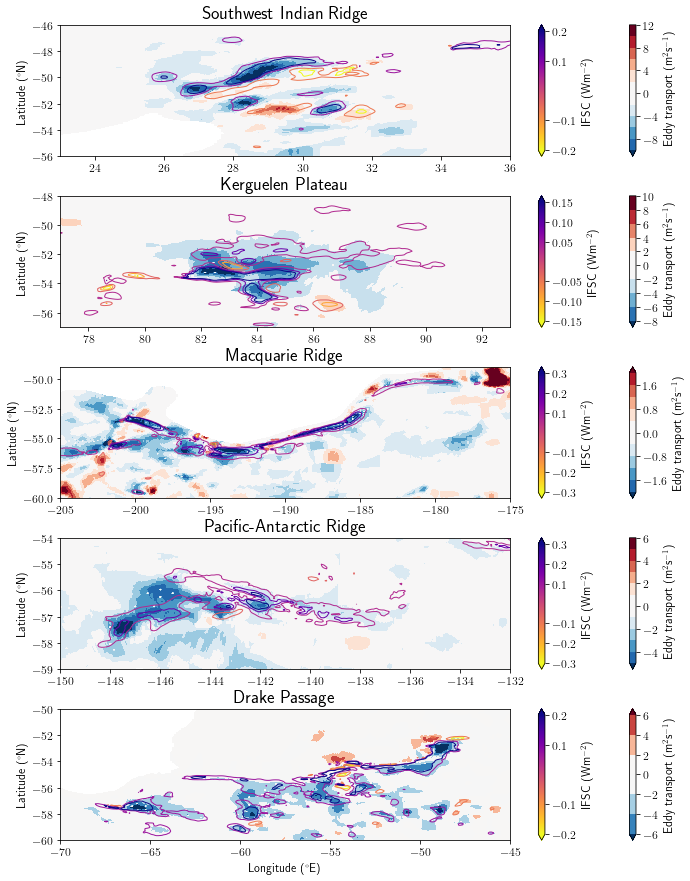

In [17]:
newcmap = cm.tools.crop_by_percent(cm.cm.tempo, 30, which='both', N= None)
fig = plt.figure(num=1,figsize=(12,15))
gs = gridspec.GridSpec(5,1) 
ax0, ax1, ax2, ax3, ax4 = plt.subplot(gs[2]), plt.subplot(gs[3]), plt.subplot(gs[4]), plt.subplot(gs[0]), plt.subplot(gs[1])
gs.update(hspace = 0.3)

transport_new = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/MR_vh_eddy_interp_circumpolar_up_arm.nc').vh_eddy_interp
p0 = (transport_new).plot.contourf(ax= ax0,x = 'x_ocean', levels = np.arange(-2.0,2.1,0.4), cmap = tmap, add_colorbar = False, linewidths = 0.5)
cb = plt.colorbar(p0,ax=ax0, label = 'Eddy transport (m$^{2}$s$^{-1}$)', pad = 0.01)
FS_upwelling = Form_stress.sel(isopycnal_bins = slice(1032.2,1032.5)).sum('isopycnal_bins')
p1 = FS_upwelling.sel(yt_ocean = slice(-63,-49),xt_ocean = slice(-205,-175)).plot.contour(ax = ax0,cmap = 'plasma_r', levels = [-0.3,-0.2,-0.1,0.1,0.2,0.3], add_colorbar = False, linewidths = 1)
#cb = plt.colorbar(p1,ax=ax0, orientation='vertical', pad = 0.02, spacing = 'proportional', extend='both')
#cb.ax.set_ylabel('Form Stress (Wm$^{-2}$)');
cmap = mpl.cm.plasma_r
norm =  mpl.colors.Normalize(vmin=-0.3, vmax=0.3)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax0, orientation='vertical', label='IFSC (Wm$^{-2}$)', spacing='proportional', extend = 'both', pad = 0.05, ticks = [-0.3,-0.2,-0.1,0.1,0.2,0.3])

ax0.set_title('Macquarie Ridge', fontsize = 18);
#############################################################################################

transport_new = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/PAR_vh_eddy_interp_circumpolar_up_arm.nc').vh_eddy_interp                                                                                                  
p0 = (transport_new).plot.contourf(ax= ax1,x = 'x_ocean', levels = np.arange(-5,7,1), cmap = tmap, add_colorbar = False, linewidths = 0.5)
cb = plt.colorbar(p0,ax=ax1, label = 'Eddy transport (m$^{2}$s$^{-1}$)',pad = 0.01)
FS_upwelling = Form_stress.sel(isopycnal_bins = slice(1032.2,1032.5)).sum('isopycnal_bins')
p1 = FS_upwelling.sel(yt_ocean = slice(-60,-49),xt_ocean = slice(-155,-130)).plot.contour(ax = ax1,cmap = 'plasma_r', levels = [-0.3,-0.2,-0.1,0.1,0.2,0.3], add_colorbar = False, linewidths = 1)
# cb = plt.colorbar(p1,ax=ax1, orientation='vertical', pad = 0.02)
# cb.ax.set_ylabel('Form Stress (Wm$^{-2}$)');
cmap = mpl.cm.plasma_r
norm =  mpl.colors.Normalize(vmin=-0.3, vmax=0.3)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax1, orientation='vertical', label='IFSC (Wm$^{-2}$)', spacing='proportional', extend = 'both', pad = 0.05, ticks = [-0.3,-0.2,-0.1,0.1,0.2,0.3])

ax1.set_title('Pacific-Antarctic Ridge', fontsize = 18);
#############################################################################################


transport_new = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/DP_vh_eddy_interp_circumpolar_up_arm.nc').vh_eddy_interp                                                                                                       
p0 = (transport_new).plot.contourf(ax= ax2,x = 'x_ocean', levels = np.arange(-6,7,2), cmap = tmap, add_colorbar = False, linewidths = 1)
cb = plt.colorbar(p0,ax=ax2, label = 'Eddy transport (m$^{2}$s$^{-1}$)', pad = 0.01)
FS_upwelling = Form_stress.sel(isopycnal_bins = slice(1032.2,1032.5)).sum('isopycnal_bins')
p1 = FS_upwelling.sel( yt_ocean = slice(-60,-50),xt_ocean = slice(-70,-45)).plot.contour(ax = ax2,cmap = 'plasma_r', levels = [-0.2,-0.1,0.1,0.2], add_colorbar = False, linewidths = 1)
# cb = plt.colorbar(p1,ax=ax2, orientation='vertical', pad = 0.02)
# cb.ax.set_ylabel('Form Stress (Wm$^{-2}$)');
cmap = mpl.cm.plasma_r
norm =  mpl.colors.Normalize(vmin=-0.2, vmax=0.2)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax2, orientation='vertical', label='IFSC (Wm$^{-2}$)', spacing='proportional', extend = 'both', pad = 0.05, ticks = [-0.2,-0.1,0.1,0.2])

ax2.set_title('Drake Passage', fontsize = 18);
#############################################################################################

transport_new = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/SWIR_vh_eddy_interp_circumpolar_up_arm.nc').vh_eddy_interp                                                                                                       
p0 = (transport_new).plot.contourf(ax= ax3,x = 'x_ocean', levels = np.arange(-10,13,2), cmap = tmap, add_colorbar = False, linewidths = 1)
cb = plt.colorbar(p0,ax=ax3, label = 'Eddy transport (m$^{2}$s$^{-1}$)', pad = 0.01)
FS_upwelling = Form_stress.sel(isopycnal_bins = slice(1032.2,1032.5)).sum('isopycnal_bins')
p1 = FS_upwelling.sel( yt_ocean = slice(-58,-40),xt_ocean = slice(20,40)).plot.contour(ax = ax3,cmap = 'plasma_r', levels = [-0.2,-0.1,0.1,0.2], add_colorbar = False, linewidths = 1)
# cb = plt.colorbar(p1,ax=ax3, orientation='vertical', pad = 0.02)
# cb.ax.set_ylabel('Form Stress (Wm$^{-2}$)');
cmap = mpl.cm.plasma_r
norm =  mpl.colors.Normalize(vmin=-0.2, vmax=0.2)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax3, orientation='vertical', label='IFSC (Wm$^{-2}$)', spacing='proportional', extend = 'both', pad = 0.05, ticks = [-0.2,-0.1,0.1,0.2])

ax3.set_title('Southwest Indian Ridge', fontsize = 18);
#############################################################################################

transport_new = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/KP_vh_eddy_interp_circumpolar_up_arm.nc').vh_eddy_interp                                                                                                       
p0 = (transport_new).plot.contourf(ax= ax4,x = 'x_ocean', levels = np.arange(-8,11,2), cmap = tmap, add_colorbar = False, linewidths = 1)
cb = plt.colorbar(p0,ax=ax4, label = 'Eddy transport (m$^{2}$s$^{-1}$)', extend = 'both', pad = 0.01)
#FS_upwelling_KP = FS_upwelling.roll(xt_ocean = 800)
#FS_upwelling_KP['xt_ocean'] = np.arange(0.05,360.01,0.1)
FS_upwelling_KP = Form_stress.sel(isopycnal_bins=slice(1032.2,1032.5)).sum('isopycnal_bins').roll(xt_ocean = 800)
FS_upwelling_KP['xt_ocean'] = np.arange(0.05,360.01,0.1)
p1 = FS_upwelling_KP.sel( yt_ocean = slice(-65,-43),xt_ocean = slice(60,100)).plot.contour(ax = ax4,cmap = 'plasma_r', levels = [-0.15,-0.1,-0.05,0.05,0.1,0.15], add_colorbar = False, linewidths = 1)
#p1 = FS_upwelling_KP.sel( yt_ocean = slice(-65,-43),xt_ocean = slice(60,100)).plot.contour(ax = ax4,cmap = 'plasma_r', levels = [-0.15,-0.1,-0.05,0.05,0.1,0.15], add_colorbar = False, linewidths = 1)

# cb = plt.colorbar(p1,ax=ax4, orientation='vertical', pad = 0.02)
# cb.ax.set_ylabel('Form Stress (Wm$^{-2}$)');
cmap = mpl.cm.plasma_r
norm =  mpl.colors.Normalize(vmin=-0.15, vmax=0.15)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax4, orientation='vertical', label='IFSC (Wm$^{-2}$)', spacing='proportional', extend = 'both', pad = 0.05, ticks = [-0.15,-0.1,-0.05,0.05,0.1,0.15])

ax4.set_title('Kerguelen Plateau', fontsize = 18);
#############################################################################################

ax0.set_ylabel('Latitude ($^\circ$N)')
ax0.set_xlabel('')
ax1.set_ylabel('Latitude ($^\circ$N)')
ax1.set_xlabel('')
ax2.set_ylabel('Latitude ($^\circ$N)')
ax2.set_xlabel('Longitude ($^\circ$E)')
ax3.set_ylabel('Latitude ($^\circ$N)')
ax3.set_xlabel('')
ax4.set_ylabel('Latitude ($^\circ$N)')
ax4.set_xlabel('')

ax0.set_ylim(-60,-49)
ax0.set_xlim(-205,-175)
ax1.set_xlim(-150,-132)
ax1.set_ylim(-59,-54)
ax2.set_xlim(-70,-45)
ax2.set_ylim(-60,-50)
ax3.set_xlim(23,36)
ax3.set_ylim(-56,-46)
ax4.set_xlim(77,93)
ax4.set_ylim(-57,-48)

fig.savefig('FSinterp_fullpage.png', dpi = 400)